In [33]:
import glob
import os
import pandas as pd
import numpy as np
from natsort import index_natsorted
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kruskal, mannwhitneyu

In [34]:
callmemobilerun = "nctc_list"

In [35]:
# Get the list of all .tsv files
data_files = glob.glob(f"/n/data1/hms/dbmi/baym/arya/projects/tools/callmemobile/intermediate/{callmemobilerun}/phigaro/raw/*/*.tsv")

dfs = []
for tsv in data_files:
    if os.stat(tsv).st_size > 0:
        frame = pd.read_csv(tsv, sep='\t')
        frame['sequence_no'] = os.path.basename(os.path.dirname(tsv))
        dfs.append(frame)

# Concatenate the DataFrames
prophage_df = pd.concat(dfs, ignore_index=True)

prophage_df

,scaffold,id,begin,end,transposable,taxonomy,sequence_no
0,UGWS01000001.1,UGWS01000001.1_prophage1,1165666,1204043,True,Myoviridae,sequence_10
1,UGWS01000001.1,UGWS01000001.1_prophage2,1268936,1312437,False,Myoviridae,sequence_10
2,UGWS01000001.1,UGWS01000001.1_prophage3,1699427,1715461,False,Unknown,sequence_10
3,UGWS01000001.1,UGWS01000001.1_prophage4,2902282,2949163,False,Siphoviridae,sequence_10
4,UGWS01000001.1,UGWS01000001.1_prophage5,4418559,4438978,False,Myoviridae,sequence_10
...,...,...,...,...,...,...,...
6524,CABDWM010000001.1,CABDWM010000001.1_prophage1,135259,154053,True,Siphoviridae,sequence_999
6525,CABDWM010000001.1,CABDWM010000001.1_prophage2,240938,273165,False,Siphoviridae,sequence_999
6526,CABDWM010000001.1,CABDWM010000001.1_prophage3,2156960,2175904,False,Siphoviridae,sequence_999
6527,CABDWM010000001.1,CABDWM010000001.1_prophage4,3165272,3210444,False,Siphoviridae,sequence_999


In [36]:
input_fasta_fof = f"/n/data1/hms/dbmi/baym/arya/projects/tools/callmemobile/input/{callmemobilerun}.txt"
seqno_mapper = {}
with open(input_fasta_fof, 'r') as f:
    for n, fasta in enumerate(f):
        fastapath = fasta.strip()
        seqno_mapper[f"sequence_{n+1}"] = [fastapath, os.path.dirname(os.path.dirname(fastapath)).split('/')[-1]]
# print(seqno_mapper)

prophage_df['fasta_path'] = prophage_df['sequence_no'].map(lambda x: seqno_mapper.get(x, [None, None])[0])
prophage_df['accnum'] = prophage_df['sequence_no'].map(lambda x: seqno_mapper.get(x, [None, None])[1])

prophage_df

,scaffold,id,begin,end,transposable,taxonomy,sequence_no,fasta_path,accnum
0,UGWS01000001.1,UGWS01000001.1_prophage1,1165666,1204043,True,Myoviridae,sequence_10,/n/data1/hms/dbmi/baym/arya/projects/project_m...,NCTC8392
1,UGWS01000001.1,UGWS01000001.1_prophage2,1268936,1312437,False,Myoviridae,sequence_10,/n/data1/hms/dbmi/baym/arya/projects/project_m...,NCTC8392
2,UGWS01000001.1,UGWS01000001.1_prophage3,1699427,1715461,False,Unknown,sequence_10,/n/data1/hms/dbmi/baym/arya/projects/project_m...,NCTC8392
3,UGWS01000001.1,UGWS01000001.1_prophage4,2902282,2949163,False,Siphoviridae,sequence_10,/n/data1/hms/dbmi/baym/arya/projects/project_m...,NCTC8392
4,UGWS01000001.1,UGWS01000001.1_prophage5,4418559,4438978,False,Myoviridae,sequence_10,/n/data1/hms/dbmi/baym/arya/projects/project_m...,NCTC8392
...,...,...,...,...,...,...,...,...,...
6524,CABDWM010000001.1,CABDWM010000001.1_prophage1,135259,154053,True,Siphoviridae,sequence_999,/n/data1/hms/dbmi/baym/arya/projects/project_m...,NCTC5057
6525,CABDWM010000001.1,CABDWM010000001.1_prophage2,240938,273165,False,Siphoviridae,sequence_999,/n/data1/hms/dbmi/baym/arya/projects/project_m...,NCTC5057
6526,CABDWM010000001.1,CABDWM010000001.1_prophage3,2156960,2175904,False,Siphoviridae,sequence_999,/n/data1/hms/dbmi/baym/arya/projects/project_m...,NCTC5057
6527,CABDWM010000001.1,CABDWM010000001.1_prophage4,3165272,3210444,False,Siphoviridae,sequence_999,/n/data1/hms/dbmi/baym/arya/projects/project_m...,NCTC5057


In [44]:
df = pd.read_csv("../../data/3_analysis-resistance/all_rgiout_2022-12-01", sep="\t")
df = df.sort_values(
    by=["Accession_Number"],
    ascending=True,
    key=lambda x: np.argsort(index_natsorted(df["Accession_Number"])),
    ignore_index=True,
)
df[["Species", "Subspecies"]] = df["Strain"].str.split("subsp.", 1, expand=True)
# df = df.replace(np.nan, "Null", regex=True)
df["Contig"] = df["Contig"].str.split("_", expand=True)[0]
df = df.dropna(subset=['Best_Hit_ARO'])
single_acc_df = df.drop_duplicates(subset=["Accession_Number"])
year_dict = (
    single_acc_df[["Accession_Number", "Year_Cultured"]]
    .set_index("Accession_Number")
    .to_dict()["Year_Cultured"]
)
amrfinder_df = pd.read_csv(
    "../../data/5_amrfinderplus/merged_amrfinderout",
    sep="\t",
    names=[
        "Accession_Number",
        "Protein identifier",
        "Contig id",
        "Start",
        "Stop",
        "Strand",
        "Gene symbol",
        "Sequence name",
        "Scope",
        "Element type",
        "Element subtype",
        "Class",
        "Subclass",
        "Method",
        "Target length",
        "Reference sequence length",
        "Coverage of reference sequence",
        "% Identity to reference sequence",
        "Alignment length",
        "Accession of closest sequence",
        "Name of closest sequence",
        "HMM id",
        "HMM description",
    ],
)
amrfinder_df = pd.merge(
    amrfinder_df,
    df.drop_duplicates("Accession_Number")[
        ["Accession_Number", "Species", "Year_Cultured"]
    ],
    on="Accession_Number",
    how="left",
)
failed_qc = pd.read_csv("/n/data1/hms/dbmi/baym/arya/projects/project_microtrawler/data/6_checkm2/failed_filter.tsv", sep="\t")
amrfinder_df = amrfinder_df[~amrfinder_df['Accession_Number'].isin(failed_qc['NCTC_Isolate'])]
amrfinder_df

,Accession_Number,Protein identifier,Contig id,Start,Stop,Strand,Gene symbol,Sequence name,Scope,Element type,...,Reference sequence length,Coverage of reference sequence,% Identity to reference sequence,Alignment length,Accession of closest sequence,Name of closest sequence,HMM id,HMM description,Species,Year_Cultured
0,NCTC10855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Escherichia coli,1955.0
1,NCTC9064,NaN,ENA|LR134315|LR134315.1,1502343.0,1503698.0,+,glpT_E448K,Escherichia fosfomycin resistant GlpT,core,AMR,...,452.0,100.0,99.34,452.0,WP_000948731.1,glycerol-3-phosphate transporter GlpT,NaN,NaN,Escherichia coli,1952.0
2,NCTC9064,NaN,ENA|LR134315|LR134315.1,4189258.0,4190346.0,+,pmrB_Y358N,Escherichia colistin resistant PmrB,core,AMR,...,363.0,100.0,99.45,363.0,WP_001300761.1,two-component system sensor histidine kinase PmrB,NaN,NaN,Escherichia coli,1952.0
3,NCTC12082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Legionella spiritensis,1987.0
4,NCTC13691,NaN,UAWM01000001.1,1378028.0,1381177.0,-,oqxB5,multidrug efflux RND transporter permease subu...,core,AMR,...,1050.0,100.0,100.00,1050.0,WP_004174783.1,multidrug efflux RND transporter permease subu...,NaN,NaN,Klebsiella pneumoniae,1940.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4221,NCTC11012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Moraxella equi,1970.0
4222,NCTC7999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Erysipelothrix rhusiopathiae,1949.0
4223,NCTC11010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oligella urethralis,1970.0
4224,NCTC9155,NaN,CABDVN010000002.1,1343507.0,1344379.0,+,blaPLA-1,broad-spectrum class A beta-lactamase PLA-1,core,AMR,...,291.0,100.0,100.00,291.0,WP_032699754.1,broad-spectrum class A beta-lactamase PLA-1,NaN,NaN,Raoultella ornithinolytica,1952.0


In [91]:
amrfinder_df['Accession_Number'].unique().shape

(1800,)

In [56]:
amrfinder_df.columns

Index(['Accession_Number', 'Protein identifier', 'Contig id', 'Start', 'Stop',
       'Strand', 'Gene symbol', 'Sequence name', 'Scope', 'Element type',
       'Element subtype', 'Class', 'Subclass', 'Method', 'Target length',
       'Reference sequence length', 'Coverage of reference sequence',
       '% Identity to reference sequence', 'Alignment length',
       'Accession of closest sequence', 'Name of closest sequence', 'HMM id',
       'HMM description', 'Species', 'Year_Cultured'],
      dtype='object')

In [93]:
# Step 1: Calculate the number of prophages per genome
prophage_counts = prophage_df.groupby('accnum').size().reset_index(name='num_prophages')

# Step 2: Get the list of antibiotic resistance classes per genome
amr_classes = amrfinder_df.groupby('Accession_Number')['Class'].apply(list).reset_index()
amr_classes.rename(columns={'Accession_Number': 'genome', 'Class': 'amr_classes'}, inplace=True)

# **Updated**: Use genomes only from amrfinder_df (QC-passing genomes)
all_genomes = set(amrfinder_df['Accession_Number'].unique())
genome_df = pd.DataFrame({'genome': list(all_genomes)})

# Merge prophage counts into genome_df
genome_df = genome_df.merge(prophage_counts, left_on='genome', right_on='accnum', how='left')

# Merge AMR classes into genome_df
genome_df = genome_df.merge(amr_classes, on='genome', how='left')

# Fill NaN values for 'num_prophages' (genomes without prophages)
genome_df['num_prophages'] = genome_df['num_prophages'].fillna(0).astype(int)

# Fill NaN values for 'amr_classes' (genomes without resistance genes)
genome_df['amr_classes'] = genome_df['amr_classes'].apply(lambda x: x if isinstance(x, list) else ['No Resistance'])
genome_df

,genome,accnum,num_prophages,amr_classes
0,NCTC6135,NCTC6135,5,"[TETRACYCLINE, FOSFOMYCIN, FOSFOMYCIN, FOSFOMY..."
1,NCTC13452,NCTC13452,8,"[RIFAMYCIN, BETA-LACTAM, BETA-LACTAM]"
2,NCTC10213,NCTC10213,5,[FOSFOMYCIN]
3,NCTC11193,NaN,0,[nan]
4,NCTC9097,NCTC9097,8,"[FOSFOMYCIN, COLISTIN]"
...,...,...,...,...
1795,NCTC10409,NCTC10409,1,[nan]
1796,NCTC12242,NaN,0,[nan]
1797,NCTC10662,NCTC10662,5,"[BETA-LACTAM, AMINOGLYCOSIDE, BETA-LACTAM, FLU..."
1798,NCTC12219,NaN,0,[nan]


In [97]:
# Step 3: Explode amr_classes to have one class per row
exploded_df = genome_df.explode('amr_classes')

exploded_df

,genome,accnum,num_prophages,amr_classes
0,NCTC6135,NCTC6135,5,TETRACYCLINE
0,NCTC6135,NCTC6135,5,FOSFOMYCIN
0,NCTC6135,NCTC6135,5,FOSFOMYCIN
0,NCTC6135,NCTC6135,5,FOSFOMYCIN
1,NCTC13452,NCTC13452,8,RIFAMYCIN
...,...,...,...,...
1797,NCTC10662,NCTC10662,5,FLUOROQUINOLONE
1797,NCTC10662,NCTC10662,5,PHENICOL
1797,NCTC10662,NCTC10662,5,FOSFOMYCIN
1798,NCTC12219,NaN,0,NaN


In [102]:
class_to_mechanism = {
    # Cell wall synthesis
    'BETA-LACTAM': 'Cell Wall Synthesis Inhibitor',
    'FOSFOMYCIN': 'Cell Wall Synthesis Inhibitor',
    'GLYCOPEPTIDE': 'Cell Wall Synthesis Inhibitor',
    
    # Membrane disrupting
    'COLISTIN': 'Cell Membrane Disruptor',
    'LIPOPEPTIDE': 'Cell Membrane Disruptor',
    
    # Protein synthesis
    'AMINOGLYCOSIDE': 'Protein Synthesis Inhibitor',
    'MACROLIDE': 'Protein Synthesis Inhibitor',
    'TETRACYCLINE': 'Protein Synthesis Inhibitor',
    'PHENICOL': 'Protein Synthesis Inhibitor',
    'LINCOSAMIDE': 'Protein Synthesis Inhibitor',
    'STREPTOGRAMIN': 'Protein Synthesis Inhibitor',
    'PLEUROMUTILIN': 'Protein Synthesis Inhibitor',
    'OXAZOLIDINONE': 'Protein Synthesis Inhibitor',
    'FUSIDIC ACID': 'Protein Synthesis Inhibitor',
    'STREPTOTHRICIN': 'Protein Synthesis Inhibitor',
    'LINCOSAMIDE/STREPTOGRAMIN': 'Protein Synthesis Inhibitor',
    'LINCOSAMIDE/MACROLIDE/STREPTOGRAMIN': 'Protein Synthesis Inhibitor',
    'LINCOSAMIDE/PLEUROMUTILIN/STREPTOGRAMIN': 'Protein Synthesis Inhibitor',
    'LINCOSAMIDE/PLEUROMUTILIN': 'Protein Synthesis Inhibitor',
    'MACROLIDE/PLEUROMUTILIN': 'Protein Synthesis Inhibitor',


    
    # Quinolones
    'QUINOLONE': 'DNA Synthesis Inhibitor',
    'FLUOROQUINOLONE': 'DNA Synthesis Inhibitor',
    'PHENICOL/QUINOLONE': 'DNA Synthesis Inhibitor',
    'AMINOGLYCOSIDE/QUINOLONE': 'DNA Synthesis Inhibitor',
    'QUINOLONE/TRICLOSAN': 'DNA Synthesis Inhibitor',


    
    # RNA synthesis
    'RIFAMYCIN': 'RNA Synthesis Inhibitor',
    
    # Metabolic pathways
    'SULFONAMIDE': 'Metabolic Pathway Inhibitor',
    'TRIMETHOPRIM': 'Metabolic Pathway Inhibitor',
    'FOSMIDOMYCIN': 'Metabolic Pathway Inhibitor',
    
    # Multidrug
    'MULTIDRUG': 'Multidrug Resistance',
    
    # DNA Damage
    'BLEOMYCIN': 'DNA Damage Agent',
    
    
    # Antiseptic
    'QUATERNARY AMMONIUM': 'Antiseptic/Disinfectant',
    
    
    'No Resistance': 'No Resistance',
}

In [119]:
exploded_df['mechanism'] = exploded_df['amr_classes'].map(class_to_mechanism)
exploded_df['mechanism'] = exploded_df['mechanism'].fillna('No Resistance')
exploded_df['amr_classes'] = exploded_df['amr_classes'].fillna('No Resistance').str.title()

dna_damaging_mechanisms_set = set(['DNA Synthesis Inhibitor', 'DNA Damage Agent'])
exploded_df['is_dna_damaging'] = exploded_df['mechanism'].isin(dna_damaging_mechanisms_set)

exploded_df

,genome,accnum,num_prophages,amr_classes,mechanism,dna_damaging_resistance,is_dna_damaging
0,NCTC6135,NCTC6135,5,Tetracycline,Protein Synthesis Inhibitor,False,False
0,NCTC6135,NCTC6135,5,Fosfomycin,Cell Wall Synthesis Inhibitor,False,False
0,NCTC6135,NCTC6135,5,Fosfomycin,Cell Wall Synthesis Inhibitor,False,False
0,NCTC6135,NCTC6135,5,Fosfomycin,Cell Wall Synthesis Inhibitor,False,False
1,NCTC13452,NCTC13452,8,Rifamycin,RNA Synthesis Inhibitor,False,False
...,...,...,...,...,...,...,...
1797,NCTC10662,NCTC10662,5,Fluoroquinolone,DNA Synthesis Inhibitor,True,True
1797,NCTC10662,NCTC10662,5,Phenicol,Protein Synthesis Inhibitor,False,False
1797,NCTC10662,NCTC10662,5,Fosfomycin,Cell Wall Synthesis Inhibitor,False,False
1798,NCTC12219,NaN,0,No Resistance,No Resistance,False,False


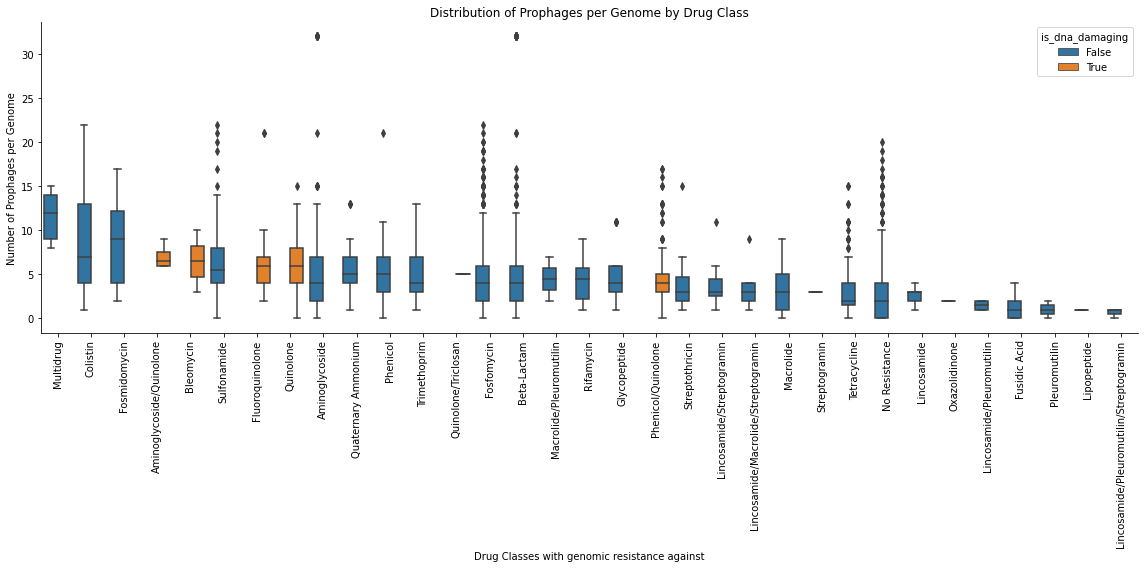

Kruskal-Wallis H-test statistic: 677.458711423889
P-value: 5.528558136198446e-122


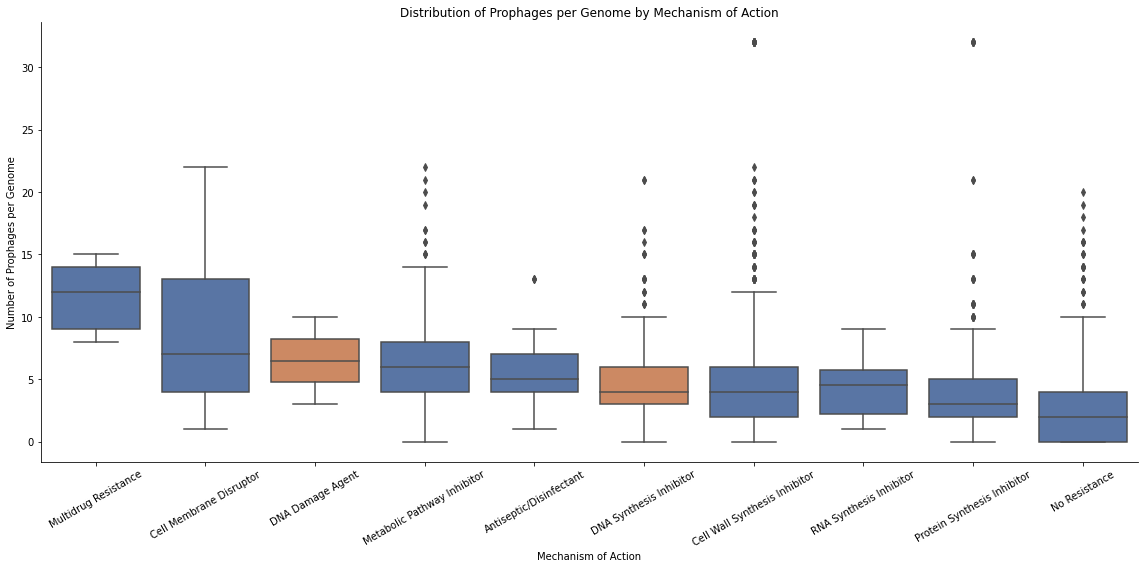

Kruskal-Wallis H-test statistic: 518.252019267224
P-value: 7.088119958397227e-106


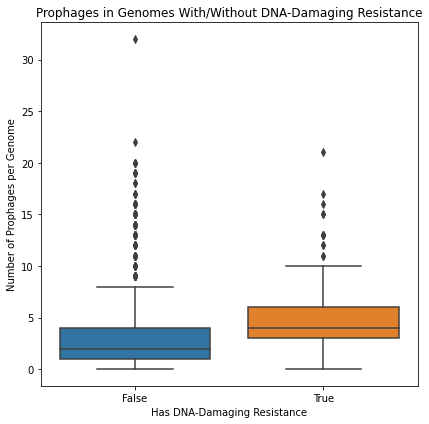

Mann-Whitney U test for DNA-damaging resistance:
Statistic: 201745.5, P-value: 2.1959868129011443e-18


In [120]:
# Group by classes
avg_prophages = exploded_df.groupby('amr_classes')['num_prophages'].mean().reset_index()
avg_prophages_sorted = avg_prophages.sort_values(by='num_prophages', ascending=False)
sorted_classes = avg_prophages_sorted['amr_classes']

plt.figure(figsize=(16, 8))
sns.boxplot(
    data=exploded_df,
    x='amr_classes',
    y='num_prophages',
    order=sorted_classes,
    hue='is_dna_damaging'
)
sns.despine()
plt.xticks(rotation=90)
plt.xlabel('Drug Classes with genomic resistance against')
plt.ylabel('Number of Prophages per Genome')
plt.title('Distribution of Prophages per Genome by Drug Class')
plt.tight_layout()
plt.show()

class_groups = exploded_df.groupby('amr_classes')['num_prophages'].apply(list)
stat, p_value = kruskal(*class_groups)
print(f"Kruskal-Wallis H-test statistic: {stat}")
print(f"P-value: {p_value}")


dna_damaging_mechanisms_set = set(['DNA Synthesis Inhibitor', 'DNA Damage Agent', 'Multiple Mechanisms'])
exploded_df['is_dna_damaging'] = exploded_df['mechanism'].isin(dna_damaging_mechanisms_set)


# Group by mechanism
avg_prophages = exploded_df.groupby('mechanism')['num_prophages'].mean().reset_index()
avg_prophages_sorted = avg_prophages.sort_values(by='num_prophages', ascending=False)
sorted_mechanisms = avg_prophages_sorted['mechanism']

color_dna_damaging = sns.color_palette('deep')[1]
color_non_dna_damaging = sns.color_palette('deep')[0]

# Map mechanisms to DNA-damaging status
mechanism_to_is_dna_damaging = exploded_df.drop_duplicates('mechanism').set_index('mechanism')['is_dna_damaging'].to_dict()

# Create palette mapping
palette = {mechanism: (color_dna_damaging if mechanism_to_is_dna_damaging.get(mechanism, False) else color_non_dna_damaging)
           for mechanism in sorted_mechanisms}

plt.figure(figsize=(16, 8))
sns.boxplot(
    data=exploded_df,
    x='mechanism',
    y='num_prophages',
    order=sorted_mechanisms,
    palette=palette
)
sns.despine()
plt.xticks(rotation=30)
plt.xlabel('Mechanism of Action')
plt.ylabel('Number of Prophages per Genome')
plt.title('Distribution of Prophages per Genome by Mechanism of Action')
plt.tight_layout()
plt.show()

mechanism_groups = exploded_df.groupby('mechanism')['num_prophages'].apply(list)
stat, p_value = kruskal(*mechanism_groups)
print(f"Kruskal-Wallis H-test statistic: {stat}")
print(f"P-value: {p_value}")

# Step 5: Focus on DNA-damaging mechanisms
dna_damaging_mechanisms = ['DNA Synthesis Inhibitor', 'DNA Damage Agent', 'Multiple Mechanisms']

exploded_df['dna_damaging_resistance'] = exploded_df['mechanism'].isin(dna_damaging_mechanisms)
genome_dna_resistance = exploded_df.groupby('genome')['dna_damaging_resistance'].any().reset_index()
genome_dna_resistance.rename(columns={'dna_damaging_resistance': 'has_dna_damaging_resistance'}, inplace=True)

genome_prophage_dna = genome_df[['genome', 'num_prophages']].merge(genome_dna_resistance, on='genome', how='left')
genome_prophage_dna['has_dna_damaging_resistance'] = genome_prophage_dna['has_dna_damaging_resistance'].fillna(False)

# Visualize
plt.figure(figsize=(6, 6))
sns.boxplot(data=genome_prophage_dna, x='has_dna_damaging_resistance', y='num_prophages')
plt.xlabel('Has DNA-Damaging Resistance')
plt.ylabel('Number of Prophages per Genome')
plt.title('Prophages in Genomes With/Without DNA-Damaging Resistance')
plt.tight_layout()
plt.show()

# Statistical test
group_with = genome_prophage_dna[genome_prophage_dna['has_dna_damaging_resistance']]['num_prophages']
group_without = genome_prophage_dna[~genome_prophage_dna['has_dna_damaging_resistance']]['num_prophages']

stat, p_value = mannwhitneyu(group_with, group_without, alternative='greater')
print(f"Mann-Whitney U test for DNA-damaging resistance:")
print(f"Statistic: {stat}, P-value: {p_value}")
